<h1>Week 3 - Test a Multiple Regression Model</h1>

The data set I am using is the Gapminder data set. A series of observational variables that have independent sources that have been centralised into one set.

I am investigating the association between incomeperperson and armedforcesrate. The association I am expecting is for higher incomeperperson there will be a lower armedforcesrate. I will also be looking at the type of government, polityscore variable, and seeing if that has a confounding effect.

<h3>SET UP</h3>

<i>Read in the packages and set appropriate options</i>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
%matplotlib inline

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)

<i>Read in the data set</i>

In [3]:
gap_data = pd.read_csv('../gapminder.csv', usecols = ['incomeperperson', 'armedforcesrate', \
                                                      'polityscore', 'country'], index_col='country')

<i>Replace the spaces with blanks and coerce into numeric and categorical</i>

In [4]:
gap_data.loc[:,'incomeperperson'] = pd.to_numeric(gap_data['incomeperperson'].replace(' ',''))
gap_data.loc[:,'armedforcesrate'] = pd.to_numeric(gap_data['armedforcesrate'].replace(' ',''))
gap_data.loc[:,'polityscore'] = pd.to_numeric(gap_data['polityscore'].replace(' ',''))

<i>Remove any rows where there are any nulls</i>

In [5]:
gap_data = gap_data[~gap_data.isnull().any(axis = 1)]

<i>Convert the polityscore variable to categorical, as it is categorical data</i>

In [6]:
gap_data.loc[:,'polityscore'] = gap_data.loc[:,'polityscore'].astype('int').astype('category')

<h2>Data preparation for this assignment:</h2>

As there are 21 levels to my categorical variable it can be considered quantitative for this assignment. I will convert the variable <u>back</u> to integer. I know I converted it deliberately to categorical above but I want to show my basic data manipulation seperate to the assignment specific data manipulation.

In [7]:
gap_data.loc[:,'polityscore'] = gap_data.loc[:,'polityscore'].astype('int')

<h2>The assignment:</h2>

<h4>STEP 1</h4>

<i>I will start by revisititing my original linear model</i>

In [8]:
reg_model = smf.ols('armedforcesrate ~ incomeperperson', data = gap_data).fit()

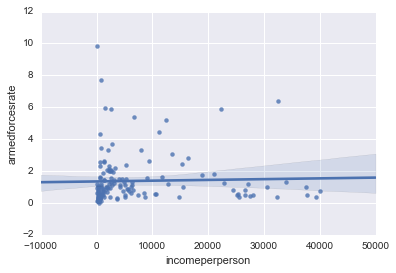

In [9]:
seaborn.regplot(x = 'incomeperperson', y = 'armedforcesrate', scatter = True, data = gap_data, order = 1)

<i>I think there is potentially a second order association between my vairables so I will look at that and a third order potential fit</i>

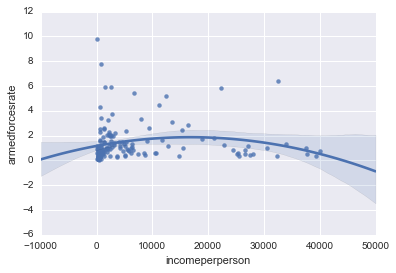

In [10]:
seaborn.regplot(x = 'incomeperperson', y = 'armedforcesrate', scatter = True, data = gap_data, order = 2)

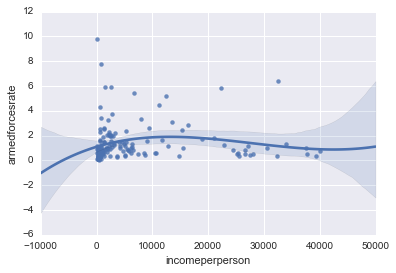

In [11]:
seaborn.regplot(x = 'incomeperperson', y = 'armedforcesrate', scatter = True, data = gap_data, order = 3)

From the above two plots I think the third oder plot has too much potential variability in the shaded area so I am happier with the second order plot, which I will now include in my model.

<i>Adding the second order term to my model</i>

In [12]:
reg_model = smf.ols('armedforcesrate ~ incomeperperson + I(incomeperperson ** 2)', data = gap_data).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        armedforcesrate   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.861
Date:                Sun, 11 Dec 2016   Prob (F-statistic):              0.159
Time:                        10:50:57   Log-Likelihood:                -273.77
No. Observations:                 149   AIC:                             553.5
Df Residuals:                     146   BIC:                             562.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   1.1663      0.180      6.472      0.000         0.810     1.522
incomeperperson          8.388e-05   4.37e-05      1.920      0.057     -2.48e-06     0.000
I(incomeperperson ** 2) -2.496e-09   1.32e-09     -1.892      0.061      -5.1e-09  1.12e-10
==============================================================================
Omnibus:                      110.243   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              746.958
Skew:                           2.775   Prob(JB):                    6.31e-163
Kurtosis:                      12.461   Cond. No.                     5.11e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This gives me the model $\hat y = 1.1663 + 0.00008388 * x - 0.000000002496 * x^2$ where $\hat y$ is the model predicted value of the response variable armedforcesrate, $x$ is the explanetory variable incomeperperson.

So my beta coefficients are $\beta_0$ = 1.1663, $\beta_1 = 0.00008388$, $\beta_2 = -0.000000002496$ 

My p-values are 0.057 > 0.05 for incomeperperson, and 0.061 > 0.05 for incomeperperson$^2$

<h4>STEP 2</h4>

As both incomeperperson terms have p-values greater than 0.05 (our 5% significance level) that means that I <u>do not</u> have sufficient cause to reject my null hypothesis ($H_0$ : there is no significant difference in the populations for our variables). I do want to note that the values are <b>very</b> close to 0.05 which siggests to me that there is probably at least one confounding variable at play.

<h4>STEP 3</h4>

In [13]:
reg_model = smf.ols('armedforcesrate ~ incomeperperson + I(incomeperperson ** 2) + polityscore', data = gap_data).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        armedforcesrate   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     8.629
Date:                Sun, 11 Dec 2016   Prob (F-statistic):           2.62e-05
Time:                        10:50:57   Log-Likelihood:                -263.40
No. Observations:                 149   AIC:                             534.8
Df Residuals:                     145   BIC:                             546.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   1.3554      0.174      7.812      0.000         1.012     1.698
incomeperperson             0.0001   4.19e-05      3.007      0.003      4.32e-05     0.000
I(incomeperperson ** 2) -3.283e-09   1.25e-09     -2.634      0.009     -5.75e-09 -8.19e-10
polityscore                -0.0936      0.020     -4.652      0.000        -0.133    -0.054
==============================================================================
Omnibus:                       98.291   Durbin-Watson:                   2.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.023
Skew:                           2.434   Prob(JB):                    5.58e-128
Kurtosis:                      11.408   Cond. No.                     5.26e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adding the potentially confounding variable polityscore has given me p-values for:
<div style = "margin-left : 50px ; margin-top : 3px ;">incomeperperson equals 0.003 which is <u>less</u> than 0.05 </div>
<div style = "margin-left : 50px ; margin-top : 3px ;">incomeperperson$^2$ equals 0.009 with is <u>less</u> 0.05 </div>
<div style = "margin-left : 50px ; margin-top : 3px ;">polityscore is less than 0.001 which is <u><i>much</i> less</u> than 0.05 </div>
<div style = "margin-top : 3px ;">So my explanetory variable associations with the response variable are all significant.</div>

The new model takes the form $\hat y = 0.174 + 0.0000419 * x_1 + 0.00000000125 * {x_1}^2 + 0.02 * x_2$ where $\hat y$ is the predicted response variable value of armedforcesrate, $x_1$ is the first explanetory variable incomeperperson that has a second order association with the response variable, $x_2$ is the second explanetory variable polityscore which was counfounding my main association.

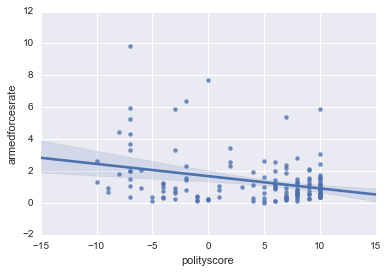

In [14]:
seaborn.regplot(x = 'polityscore', y = 'armedforcesrate', data = gap_data, order = 1)

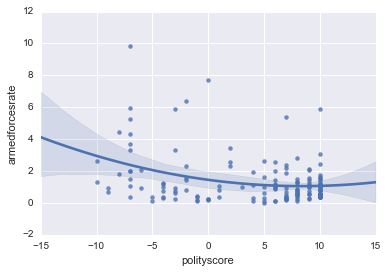

In [15]:
seaborn.regplot(x = 'polityscore', y = 'armedforcesrate', data = gap_data, order = 2)

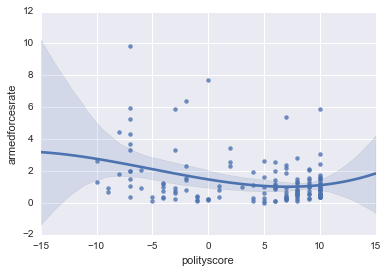

In [16]:
seaborn.regplot(x = 'polityscore', y = 'armedforcesrate', data = gap_data, order = 3)

I tried adding a further term to the model, I(polityscore ** 2), but it had a p-value of 0.627 which is <b>much</b> greater than 0.05 which is well above our 5% significance level. Thus I have decided to remove this term from my model. From the above scatter plots adding extra dimentions (higher orders) to the model doesn't seem to add anything to the fit.

<h4>STEP 4</h4>

<h4>a)</h4>

The Q-Q plot checks for how well the data fits a normal distrobution. 

If the data conforms to a normal distrobution then the data points (as blue dots) will all overlap with the fitted normal distrobution that is also plotted (as a red line).

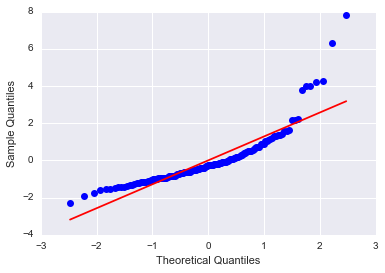

In [17]:
fig1 = sm.qqplot(reg_model.resid, line = 'r')

There is very little overlap, the data dots don't even follow a straight line. The residuals don't follow anything close to a normal distrobution.

This means that my model still isn't adhering to one of the assumptions of regression. However, most of the variation seems to be happening towards the upper quantiles of my model.

<h4>b)</h4>

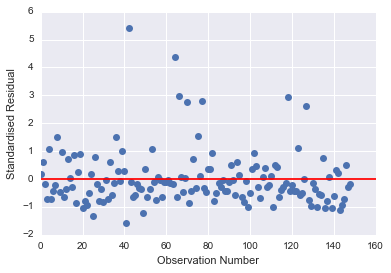

In [18]:
st_residuals = pd.DataFrame(reg_model.resid_pearson)
fig2 = plt.plot(st_residuals, 'o', ls = 'None')
plt.ylabel('Standardised Residual')
plt.xlabel('Observation Number')
l = plt.axhline(y = 0, color = 'r')

These values already seem to have a few observations that are deviating away from the main group of points on the graph.

<h4>c)</h4>

Leaverage is a measure of how much the predicted scores of the other observations might differ if the labelled observations were not included in the regression analysis.

Leaverage scores range from 0 to 1 where a score of 0 indicates no change to the model and a score of 1 means a huge change to the model.

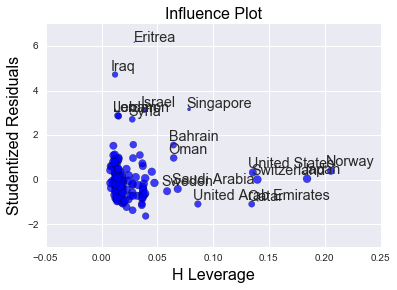

In [19]:
fig3 = sm.graphics.influence_plot(reg_model, size = 1)

There are some observations that have resuidual more than 2. This indicates that they are outliers. Some of the countries with outlying scores are Singapore, Iraq, Israel along with some others. It would be interesting to look at their histories to see if we can pin-point the reason the model would behave irregularly with them.

None of the observations have a particularly high leaverage but there are a number of observations that sit higher than the average for this data set. 

<h4>d)</h4>

I will quickly look at a series of further exploratory plots around the variables.

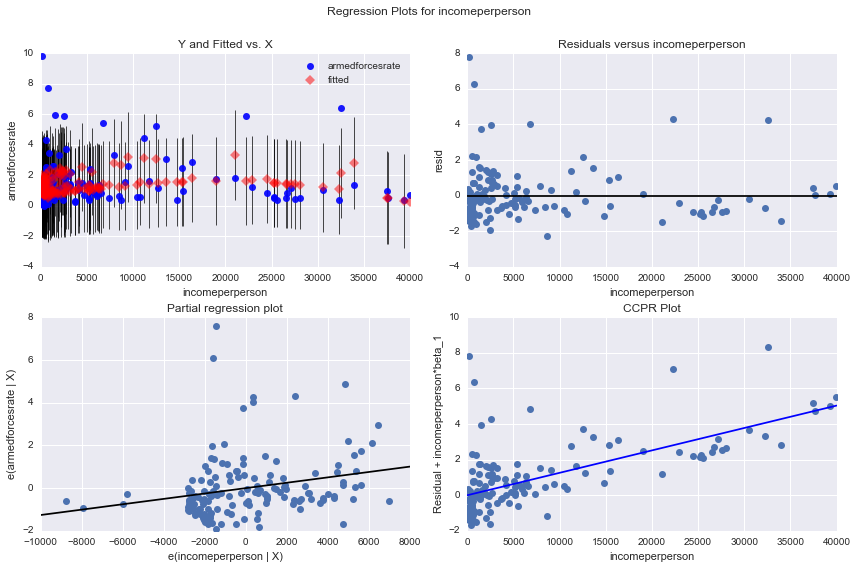

In [20]:
fig4 = plt.figure(figsize = (12,8))
fig4 = sm.graphics.plot_regress_exog(reg_model, "incomeperperson", fig = fig4)

All the plots have a very spread out feel to them. All of my analysis visualisations are straying away from a tight fit. My model has a better fit away from the top and bottom values, as shown by the Q-Q plot.

My distribution of residuals does not follow a normal distrobution as shown in step 4 a). 

There are outliers identified in step 4 c) which looks at standardised residuals. All but one of these have a leverage value less than 0.05 which means there would be practically no effect on the model coefficients if these values were removed. The outlying value for Singapore has a slightly higher leverage value but it is still small enough to not cause much change if removed from the data set.

From the leverage analysis values for countries Norway, United States, Switzerland, and the others that have higher leverage values are going to be the most influential to the model with their presence or absence from the data set.

My leverage analysis indicates that removing any of my observations will not have a great effect on my model, the majority of the values have a leverage value less than 0.05 which is very small.